In [2]:
%pylab inline
from qsweepy import *
from qsweepy.ponyfiles import *

import numpy as np
from importlib import reload
from scipy.io import savemat

Populating the interactive namespace from numpy and matplotlib
Failed loading module Keysight_M3102A:  No module named 'keysightSD1'
Failed loading module Keysight_M3202A:  No module named 'keysightSD1'
[WinError 126] The specified module could not be found
Failed loading module Signal_Hound_SA:  name 'signal_hound_dll' is not defined


In [3]:
sample_name = None
db = database.MyDatabase()
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)

In [4]:
for id in [1236]:#[3152]:#[1243, 1244, 1245, 1246]:
    m = exdir_db_inst.select_measurement_by_id(id)
    savemat(r'C:\Users\User\Desktop\matlab\{id}_{type}.mat'.format(id=m.id, type=m.measurement_type), 
        {'resultnumbers':m.datasets['resultnumbers'].data})

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-19\001236-process_tomography_iswap-1906-002_4_down


KeyError: 'resultnumbers'

In [26]:
len(real(m.datasets['reconstruction'].data))

16

In [111]:
fig, axes = subplots(1,2,num='Process Chi matrix', figsize=(9,4), sharex=True, sharey=True)
# im0 = axes[0].imshow(reshape(transpose(reshape(real(m.datasets['reconstruction'].data), (4,4,4,4)),(0,2,1,3)), (16,16)), vmin=-1, vmax=1, cmap='RdBu_r')
# im1 = axes[1].imshow(-reshape(transpose(reshape(imag(m.datasets['reconstruction'].data), (4,4,4,4)),(0,2,1,3)), (16,16)), vmin=-1, vmax=1, cmap='RdBu_r')

im0 = axes[0].imshow(real(m.datasets['reconstruction'].data), vmin=-1, vmax=1, cmap='RdBu_r')
im1 = axes[1].imshow(imag(m.datasets['reconstruction'].data), vmin=-1, vmax=1, cmap='RdBu_r')
axes[0].set_xticks(arange(16))
axes[1].set_xticks(arange(16))
axes[0].set_yticks(arange(16))
colorbar(im0, ax=axes)
plt.savefig(r'C:\tupoye-govno\iswap-tomography1.svg')
plt.savefig(r'C:\tupoye-govno\iswap-tomography1.png')

In [79]:
x_,y_ = np.meshgrid(np.linspace(0,15,16),np.linspace(0,15,16))

In [33]:
from mpl_toolkits.mplot3d import Axes3D

In [100]:
%matplotlib notebook

In [95]:
import matplotlib.cm as cm

In [110]:
fig =plt.figure(figsize=(8,5))
ax = fig.gca(projection = '3d')
top=real(m.datasets['reconstruction'].data).ravel()
top_tr=real(iswap_ideal_chi).ravel()
bottom=np.zeros(len(top))
width=np.ones(len(top))
depth=np.ones(len(top))
x=x_.ravel()
y=y_.ravel()
ax.bar3d(x,y,bottom,width,depth,top,shade=True,color=cm.Spectral_r(top))
# ax.bar3d(x,y,bottom,width,depth,top_tr,shade=True,color='white',edgecolor='red')
ax.view_init(elev=60)
ax.set_zlim(0,1)
plt.show()

In [6]:
values, vectors = linalg.eigh(np.conj(m.datasets['reconstruction'].data))
values/4

array([-4.54636980e-11, -4.21787025e-11, -4.07215265e-11, -3.96336922e-11,
       -3.87269921e-11, -3.73990463e-11, -3.53553182e-11, -3.31557993e-11,
       -3.06799829e-11, -2.04915598e-11,  2.93837136e-03,  7.70524001e-03,
        3.22819526e-02,  4.39168780e-02,  5.71175208e-02,  8.61402249e-01])

In [7]:
d = 4

[0.9970839  1.02360916 0.98313025 0.99553844]


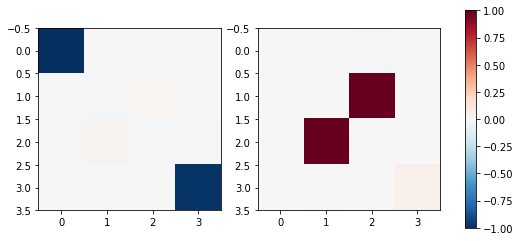

In [8]:
for purification_id in range(1):
    purified = np.conj(reshape(vectors[:,-purification_id-1]*2, (d,d)))
    #
    fig, axes = subplots(1,2,num='Purified unitary #'+str(purification_id), figsize=(9,4))
    im0 = axes[0].imshow(real(purified), vmin=-1, vmax=1, cmap='RdBu_r')
    im1 = axes[1].imshow(imag(purified), vmin=-1, vmax=1, cmap='RdBu_r')
    colorbar(im0, ax=axes)
    print (np.abs(linalg.eig(purified)[0]))

In [9]:
def plot_unitary(unitary):
    fig, axes = subplots(1,2,num='Ideal chi-matrix', figsize=(9,4))
    unitary_chi = kron(unitary, conj(unitary))
    unitary_chi = conj(reshape(transpose(reshape(unitary_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
    im0 = axes[0].imshow(real(unitary_chi), cmap='RdBu_r', vmin=-1, vmax=1)
    im1 = axes[1].imshow(imag(unitary_chi), cmap='RdBu_r', vmin=-1, vmax=1)
    colorbar(im0, ax=axes)
    return unitary_chi

In [12]:
#iswap_ideal = np.asarray([[1, -1, 0, 0], [1, 1, 0, 0], [0, 0, 1, -1], [0, 0, 1, 1]])/np.sqrt(2)
#iswap_ideal = np.asarray([[1, 1j, 0, 0], [1j, 1, 0, 0], [0, 0, 1, 1j], [0, 0, 1j, 1]])/np.sqrt(2)
iswap_ideal = np.asarray([[1, 0, 0, 0], [0, 0, 1j, 0], [0, 1j, 0, 0], [0, 0, 0, 1]])
#iswap_ideal = np.asarray([[0,0,0,1j],[0,1,0,0],[0,0,1,0],[1j,0,0,0]])
print(iswap_ideal)
#iswap_ideal = iswap_ideal@iswap_ideal
#iswap_ideal = np.asarray([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,-1,0]])
np.abs(np.sum(iswap_ideal*np.conj(purified)/np.max(np.abs(linalg.eig(purified)[0])))/4)**2
iswap_ideal_chi = np.reshape(np.transpose(np.reshape(kron(iswap_ideal, conj(iswap_ideal)), (4,4,4,4)), (0,2,1,3)),(16,16))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


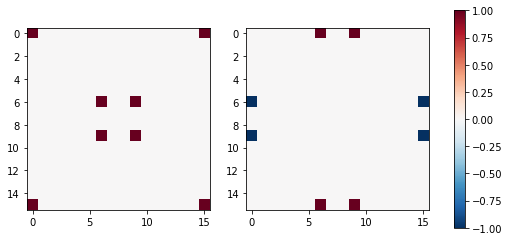

In [13]:
iswap_ideal_chi = plot_unitary(iswap_ideal)

In [14]:
sum(np.conj(iswap_ideal_chi)*m.datasets['reconstruction'].data)/16


(0.8607348897443112-8.673617379884035e-19j)

In [15]:
(sum(np.conj(iswap_ideal_chi)*m.datasets['reconstruction'].data)/16*4+1)/(4+1)

(0.888587911795449-6.938893903907229e-19j)

In [66]:
iswap_ideal = np.asarray([[1, 0, 0, 0], [0, 0, 1j, 0], [0, 1j, 0, 0], [0, 0, 0, 1]])
Z1pihalf = np.asarray([[1,0,0,0],[0,1j,0,0],[0,0,1,0],[0,0,0,1j]])
X1pihalf = np.asarray([[1,1j,0,0],[1j,1,0,0],[0,0,1,1j],[0,0,1j,1]])/np.sqrt(2)
X2pihalf = np.asarray([[1,0,1j,0],[0,1,0,1j],[1j,0,1,0],[0,1j,0,1]])/np.sqrt(2)
X1mpihalf = np.asarray([[1,-1j,0,0],[-1j,1,0,0],[0,0,1,-1j],[0,0,-1j,1]])/np.sqrt(2)
X2mpihalf = np.asarray([[1,0,-1j,0],[0,1,0,-1j],[-1j,0,1,0],[0,-1j,0,1]])/np.sqrt(2)
Y1pihalf = np.asarray([[1,1,0,0],[-1,1,0,0],[0,0,1,1],[0,0,-1,1]])/np.sqrt(2)
Y2pihalf = np.asarray([[1,0,1,0],[0,1,0,1],[-1,0,1,0],[0,-1,0,1]])/np.sqrt(2)
Z2pihalf = np.asarray([[1,0,0,0],[0,1,0,0],[0,0,1j,0],[0,0,0,1j]])
Z2mpihalf = np.asarray([[1,0,0,0],[0,1,0,0],[0,0,-1j,0],[0,0,0,-1j]])
U_grover_central = X1pihalf@X2pihalf@Y1pihalf@Y2pihalf@iswap_ideal@X1mpihalf@X2mpihalf
iswap_chi = m.datasets['reconstruction'].data
U_groverx3_central = X1pihalf@X2pihalf@iswap_ideali@Y1pihalf@Y2pihalf@iswap_ideal@X1mpihalf@X2mpihalf
#U_grover_central = X1pihalf@X1pihalf@iswap_ideal@X1pihalf@X1pihalf

NameError: name 'iswap_ideali' is not defined

In [36]:
X1pihalf_chi = kron(X1pihalf, conj(X1pihalf))
X1pihalf_chi = conj(reshape(transpose(reshape(X1pihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
X2pihalf_chi = kron(X2pihalf, conj(X2pihalf))
X2pihalf_chi = conj(reshape(transpose(reshape(X2pihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
Y1pihalf_chi = kron(Y1pihalf, conj(Y1pihalf))
Y1pihalf_chi = conj(reshape(transpose(reshape(Y1pihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
Y2pihalf_chi = kron(Y2pihalf, conj(Y2pihalf))
Y2pihalf_chi = conj(reshape(transpose(reshape(Y2pihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
X1mpihalf_chi = kron(X1mpihalf, conj(X1mpihalf))
X1mpihalf_chi = conj(reshape(transpose(reshape(X1mpihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))
X2mpihalf_chi = kron(X2mpihalf, conj(X2mpihalf))
X2mpihalf_chi = conj(reshape(transpose(reshape(X2mpihalf_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))

In [37]:
U_grover = X1pihalf_chi@X2pihalf_chi@iswap_chi@Y1pihalf_chi@Y2pihalf_chi@iswap_chi@X1mpihalf_chi@X2mpihalf_chi

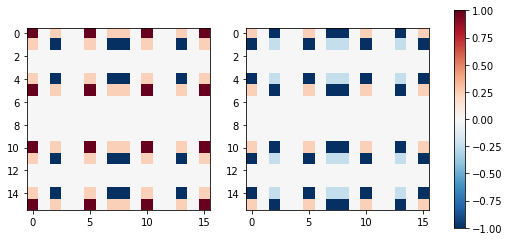

In [38]:
fig, axes = subplots(1,2,num='Process Chi matrix', figsize=(9,4))
im0 = axes[0].imshow(real(U_grover), vmin=-1, vmax=1, cmap='RdBu_r')
im1 = axes[1].imshow(imag(U_grover), vmin=-1, vmax=1, cmap='RdBu_r')
colorbar(im0, ax=axes)

In [80]:
d=4
grover_central_chi = kron(U_grover_central, conj(U_grover_central))
grover_central_chi = conj(reshape(transpose(reshape(grover_central_chi, (d,d,d,d)), (0,2,1,3)), (16,16)))

In [81]:
#plot_unitary(U_grover_central)
plt.

In [82]:
(sum(np.conj(grover_central_chi)*m.datasets['reconstruction'].data)/16*4+1)/(4+1)

(0.8618170458872711+0j)

In [525]:
m.datasets['measurement'].data[2,2,5,5,:]

array([2604., 2847., 2328., 2221.])

In [518]:
m.datasets['measurement'].data[5,2,5,5,:]

array([2733., 2683., 2404., 2180.])

In [519]:
m.datasets['measurement'].data[2,5,5,5,:]

array([2964., 2529., 2292., 2215.])

In [520]:
m.datasets['measurement'].data[5,5,5,5,:]

array([2693., 2576., 2464., 2267.])

In [441]:
(m.datasets['measurement'].data[2,2,5,5,:], m.datasets['measurement'].data[5,2,5,5,:], 
 m.datasets['measurement'].data[2,5,5,5,:], m.datasets['measurement'].data[5,5,5,5,:])

(array([6401., 1736., 1303.,  560.]),
 array([1526., 6349.,  790., 1335.]),
 array([2393.,  969., 5344., 1294.]),
 array([ 831., 2423., 1339., 5407.]))